In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
train_set = pd.read_csv('watermelon.csv')
test_set = pd.read_csv('watermelon_test.csv')


In [3]:
x_train = train_set.drop("好瓜", axis=1)
y_train = train_set["好瓜"]
print(x_train)
print(y_train)

    色泽  根蒂  敲声  纹理  脐部  触感
0   青绿  蜷缩  浊响  清晰  凹陷  硬滑
1   乌黑  蜷缩  沉闷  清晰  凹陷  硬滑
2   乌黑  蜷缩  浊响  清晰  凹陷  硬滑
3   青绿  蜷缩  沉闷  清晰  凹陷  硬滑
4   浅白  蜷缩  浊响  清晰  凹陷  硬滑
5   青绿  稍蜷  浊响  清晰  稍凹  软粘
6   乌黑  稍蜷  浊响  稍糊  稍凹  软粘
7   乌黑  稍蜷  浊响  清晰  稍凹  硬滑
8   乌黑  稍蜷  沉闷  稍糊  稍凹  硬滑
9   青绿  硬挺  清脆  清晰  平坦  软粘
10  浅白  硬挺  清脆  模糊  平坦  硬滑
11  浅白  蜷缩  浊响  模糊  平坦  软粘
12  青绿  稍蜷  浊响  稍糊  凹陷  硬滑
13  浅白  稍蜷  沉闷  稍糊  凹陷  硬滑
14  乌黑  稍蜷  浊响  清晰  稍凹  软粘
15  浅白  蜷缩  浊响  模糊  平坦  硬滑
16  青绿  蜷缩  沉闷  稍糊  稍凹  硬滑
0     是
1     是
2     是
3     是
4     是
5     是
6     是
7     是
8     否
9     否
10    否
11    否
12    否
13    否
14    否
15    否
16    否
Name: 好瓜, dtype: object


In [4]:
x_train = pd.get_dummies(x_train)
y_train = pd.get_dummies(y_train)

print(x_train)
print(y_train)

    色泽_乌黑  色泽_浅白  色泽_青绿  根蒂_硬挺  根蒂_稍蜷  根蒂_蜷缩  敲声_沉闷  敲声_浊响  敲声_清脆  纹理_模糊  \
0       0      0      1      0      0      1      0      1      0      0   
1       1      0      0      0      0      1      1      0      0      0   
2       1      0      0      0      0      1      0      1      0      0   
3       0      0      1      0      0      1      1      0      0      0   
4       0      1      0      0      0      1      0      1      0      0   
5       0      0      1      0      1      0      0      1      0      0   
6       1      0      0      0      1      0      0      1      0      0   
7       1      0      0      0      1      0      0      1      0      0   
8       1      0      0      0      1      0      1      0      0      0   
9       0      0      1      1      0      0      0      0      1      0   
10      0      1      0      1      0      0      0      0      1      1   
11      0      1      0      0      0      1      0      1      0      1   
12      0   

In [5]:
x_test = test_set.drop("好瓜", axis=1)
y_test = test_set["好瓜"]
print(x_test)
print(y_test)

   色泽  根蒂  敲声  纹理  脐部  触感
0   2   2   1   2   2   2
1   2   2   1   3   2   1
2   2   2   2   2   2   1
3   1   3   3   3   3   2
0    1
1    1
2    2
3    2
Name: 好瓜, dtype: int64


In [6]:
dtc= DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train, y_train)
# dtc.score(x_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(dtc, out_file=f)

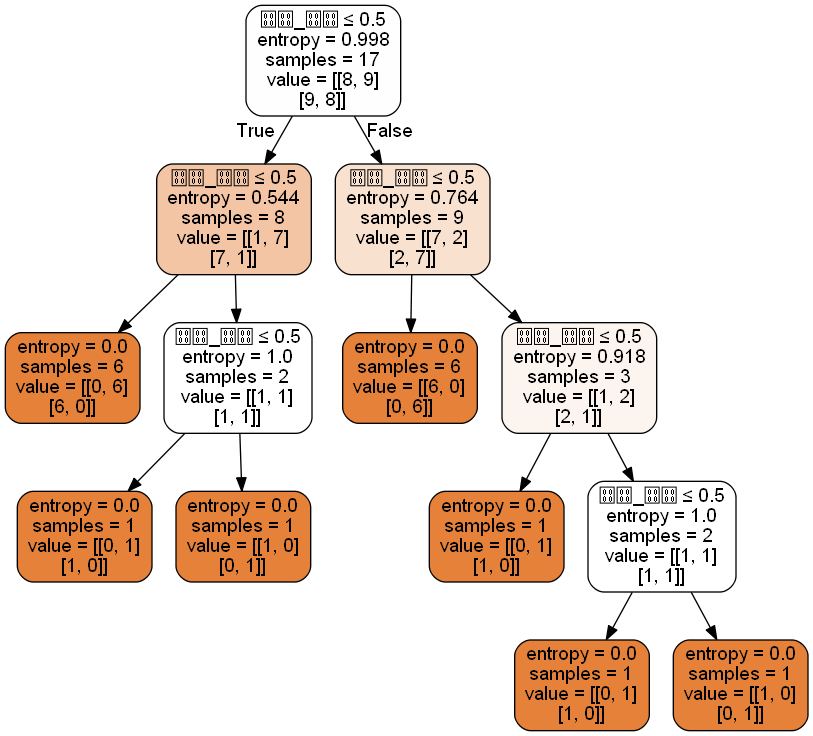

In [8]:
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO
import os     
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'

dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data,
                         feature_names=x_train.columns.values.tolist(),
                         class_names=y_train.columns.values.tolist(),
                         filled=True, rounded=True,
                         special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("watermelon_decision_tree.pdf")
Image(graph.create_png()) 

In [9]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier


# 仍然使用自带的iris数据
iris = datasets.load_iris()
x = iris.data[:, [0, 2]]
y = iris.target
print(x)
print(y)

[[ 5.1  1.4]
 [ 4.9  1.4]
 [ 4.7  1.3]
 [ 4.6  1.5]
 [ 5.   1.4]
 [ 5.4  1.7]
 [ 4.6  1.4]
 [ 5.   1.5]
 [ 4.4  1.4]
 [ 4.9  1.5]
 [ 5.4  1.5]
 [ 4.8  1.6]
 [ 4.8  1.4]
 [ 4.3  1.1]
 [ 5.8  1.2]
 [ 5.7  1.5]
 [ 5.4  1.3]
 [ 5.1  1.4]
 [ 5.7  1.7]
 [ 5.1  1.5]
 [ 5.4  1.7]
 [ 5.1  1.5]
 [ 4.6  1. ]
 [ 5.1  1.7]
 [ 4.8  1.9]
 [ 5.   1.6]
 [ 5.   1.6]
 [ 5.2  1.5]
 [ 5.2  1.4]
 [ 4.7  1.6]
 [ 4.8  1.6]
 [ 5.4  1.5]
 [ 5.2  1.5]
 [ 5.5  1.4]
 [ 4.9  1.5]
 [ 5.   1.2]
 [ 5.5  1.3]
 [ 4.9  1.5]
 [ 4.4  1.3]
 [ 5.1  1.5]
 [ 5.   1.3]
 [ 4.5  1.3]
 [ 4.4  1.3]
 [ 5.   1.6]
 [ 5.1  1.9]
 [ 4.8  1.4]
 [ 5.1  1.6]
 [ 4.6  1.4]
 [ 5.3  1.5]
 [ 5.   1.4]
 [ 7.   4.7]
 [ 6.4  4.5]
 [ 6.9  4.9]
 [ 5.5  4. ]
 [ 6.5  4.6]
 [ 5.7  4.5]
 [ 6.3  4.7]
 [ 4.9  3.3]
 [ 6.6  4.6]
 [ 5.2  3.9]
 [ 5.   3.5]
 [ 5.9  4.2]
 [ 6.   4. ]
 [ 6.1  4.7]
 [ 5.6  3.6]
 [ 6.7  4.4]
 [ 5.6  4.5]
 [ 5.8  4.1]
 [ 6.2  4.5]
 [ 5.6  3.9]
 [ 5.9  4.8]
 [ 6.1  4. ]
 [ 6.3  4.9]
 [ 6.1  4.7]
 [ 6.4  4.3]
 [ 6.6  4.4]
 [ 6.8  4.8]

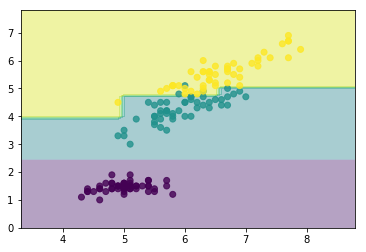

In [10]:
# 训练模型
clf = DecisionTreeClassifier(max_depth=4)
#拟合模型
clf.fit(x, y)


# 画图
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.4)
plt.scatter(x[:, 0], x[:, 1], c=y, alpha=0.8)
plt.show()

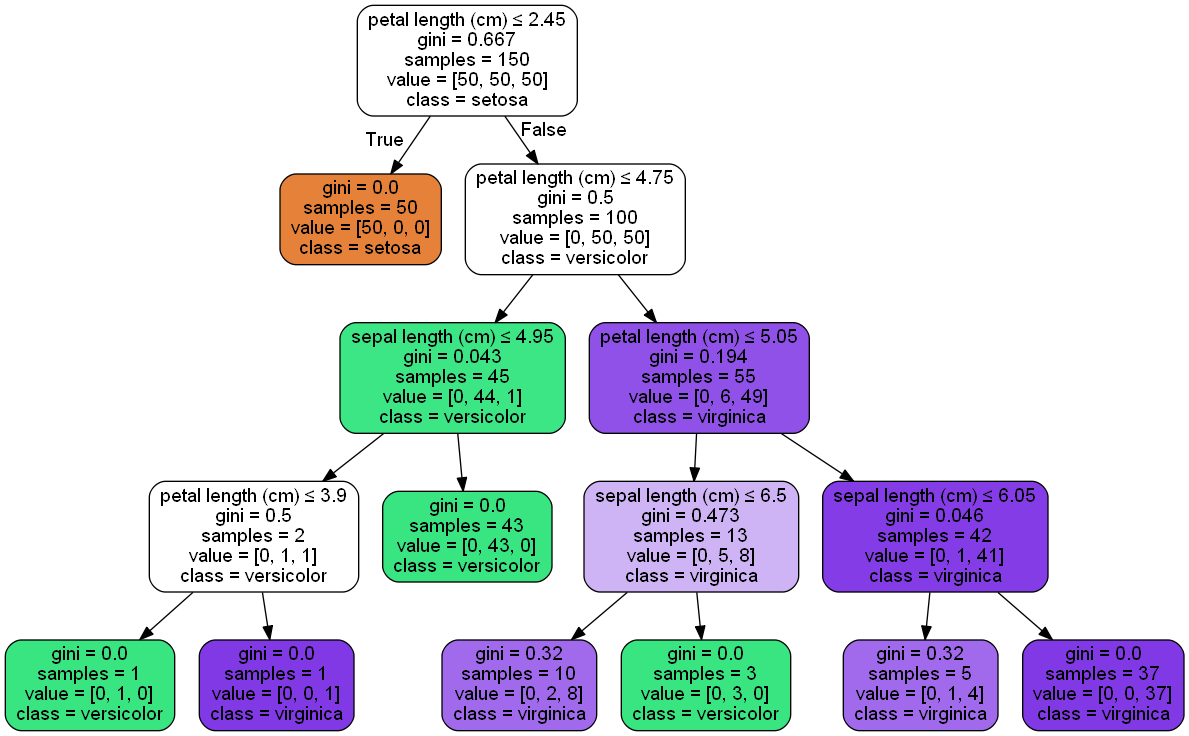

In [11]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=[iris.feature_names[0],iris.feature_names[2]],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

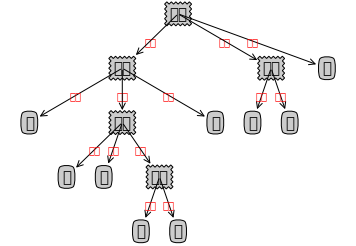

In [19]:
from math import log2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 统计label出现次数
def get_counts(data):
    total = len(data)
    results = {}
    for d in data:
        results[d[-1]] = results.get(d[-1], 0) + 1
    return results, total

# 计算信息熵
def calcu_entropy(data):
    results, total = get_counts(data)
    ent = sum([-1.0*v/total*log2(v/total) for v in results.values()])
    return ent

# 计算每个feature的信息增益
def calcu_each_gain(column, update_data):
    total = len(column)
    grouped = update_data.iloc[:, -1].groupby(by=column)
    temp = sum([len(g[1])/total*calcu_entropy(g[1]) for g in list(grouped)])
    return calcu_entropy(update_data.iloc[:, -1]) - temp

# 获取最大的信息增益的feature
def get_max_gain(temp_data):
    columns_entropy = [(col, calcu_each_gain(temp_data[col], temp_data)) for col in temp_data.iloc[:, :-1]]
    columns_entropy = sorted(columns_entropy, key=lambda f: f[1], reverse=True)
    return columns_entropy[0]

# 去掉数据中已存在的列属性内容
def drop_exist_feature(data, best_feature):
    attr = pd.unique(data[best_feature])
    new_data = [(nd, data[data[best_feature] == nd]) for nd in attr]
    new_data = [(n[0], n[1].drop([best_feature], axis=1)) for n in new_data]
    return new_data

# 获得出现最多的label
def get_most_label(label_list):
    label_dict = {}
    for l in label_list:
        label_dict[l] = label_dict.get(l, 0) + 1
    sorted_label = sorted(label_dict.items(), key=lambda ll: ll[1], reverse=True)
    return sorted_label[0][0]

# 创建决策树
def create_tree(data_set, column_count):
    label_list = data_set.iloc[:, -1]
    if len(pd.unique(label_list)) == 1:
        return label_list.values[0]
    if all([len(pd.unique(data_set[i])) ==1 for i in data_set.iloc[:, :-1].columns]):
        return get_most_label(label_list)
    best_attr = get_max_gain(data_set)[0]
    tree = {best_attr: {}}
    exist_attr = pd.unique(data_set[best_attr])
    if len(exist_attr) != len(column_count[best_attr]):
        no_exist_attr = set(column_count[best_attr]) - set(exist_attr)
        for nea in no_exist_attr:
            tree[best_attr][nea] = get_most_label(label_list)
    for item in drop_exist_feature(data_set, best_attr):
        tree[best_attr][item[0]] = create_tree(item[1], column_count)
    return tree

# 决策树绘制基本参考《机器学习实战》书内的代码以及博客：http://blog.csdn.net/c406495762/article/details/76262487
# 获取树的叶子节点数目
def get_num_leafs(decision_tree):
    num_leafs = 0
    first_str = next(iter(decision_tree))
    second_dict = decision_tree[first_str]
    for k in second_dict.keys():
        if isinstance(second_dict[k], dict):
            num_leafs += get_num_leafs(second_dict[k])
        else:
            num_leafs += 1
    return num_leafs

# 获取树的深度
def get_tree_depth(decision_tree):
    max_depth = 0
    first_str = next(iter(decision_tree))
    second_dict = decision_tree[first_str]
    for k in second_dict.keys():
        if isinstance(second_dict[k], dict):
            this_depth = 1 + get_tree_depth(second_dict[k])
        else:
            this_depth = 1
        if this_depth > max_depth:
            max_depth = this_depth
    return max_depth

# 绘制节点
def plot_node(node_txt, center_pt, parent_pt, node_type):
    arrow_args = dict(arrowstyle='<-')
    font = FontProperties(size=15)
    create_plot.ax1.annotate(node_txt, xy=parent_pt,  xycoords='axes fraction', xytext=center_pt,
                            textcoords='axes fraction', va="center", ha="center", bbox=node_type,
                            arrowprops=arrow_args, FontProperties=font)

# 标注划分属性
def plot_mid_text(cntr_pt, parent_pt, txt_str):
    font = FontProperties(size=10)
    x_mid = (parent_pt[0] - cntr_pt[0]) / 2.0 + cntr_pt[0]
    y_mid = (parent_pt[1] - cntr_pt[1]) / 2.0 + cntr_pt[1]
    create_plot.ax1.text(x_mid, y_mid, txt_str, va="center", ha="center", color='red', FontProperties=font)

# 绘制决策树
def plot_tree(decision_tree, parent_pt, node_txt):
    d_node = dict(boxstyle="sawtooth", fc="0.8")
    leaf_node = dict(boxstyle="round4", fc='0.8')
    num_leafs = get_num_leafs(decision_tree)
    first_str = next(iter(decision_tree))
    cntr_pt = (plot_tree.xoff + (1.0 +float(num_leafs))/2.0/plot_tree.totalW, plot_tree.yoff)
    plot_mid_text(cntr_pt, parent_pt, node_txt)
    plot_node(first_str, cntr_pt, parent_pt, d_node)
    second_dict = decision_tree[first_str]
    plot_tree.yoff = plot_tree.yoff - 1.0/plot_tree.totalD
    for k in second_dict.keys():
        if isinstance(second_dict[k], dict):
            plot_tree(second_dict[k], cntr_pt, k)
        else:
            plot_tree.xoff = plot_tree.xoff + 1.0/plot_tree.totalW
            plot_node(second_dict[k], (plot_tree.xoff, plot_tree.yoff), cntr_pt, leaf_node)
            plot_mid_text((plot_tree.xoff, plot_tree.yoff), cntr_pt, k)
    plot_tree.yoff = plot_tree.yoff + 1.0/plot_tree.totalD

def create_plot(dtree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    create_plot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plot_tree.totalW = float(get_num_leafs(dtree))
    plot_tree.totalD = float(get_tree_depth(dtree))
    plot_tree.xoff = -0.5/plot_tree.totalW
    plot_tree.yoff = 1.0
    plot_tree(dtree, (0.5, 1.0), '')
    plt.show()

my_data = pd.read_csv('./watermelon.csv',encoding='utf-8')
column_count = dict([(ds, list(pd.unique(my_data[ds]))) for ds in my_data.iloc[:, :-1].columns])
d_tree = create_tree(my_data, column_count)
create_plot(d_tree)